<a href="https://colab.research.google.com/github/FabinDr/Projeto-analise-de-dados---Case-unicornios/blob/main/colabDoProjeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de análise de dados - Finanças


Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.

# Importando as libs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings ## ignora alguns avisos
warnings.filterwarnings('ignore')

# Lendo os dados


In [ ]:
base_Dados = pd.read_csv('https://raw.githubusercontent.com/FabinDr/Projeto-analise-de-dados---Case-unicornios/main/unicorns%20till%20sep%202022.csv');

# Verificando a dimensão
base_Dados.shape

(1186, 7)

In [ ]:
# Analisando os primeiros dados
base_Dados.head(10)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
5,Checkout.com,$40,5/2/2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST..."
6,Instacart,$39,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
7,Databricks,$38,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates..."
8,Revolut,$33,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital"
9,Epic Games,$31.50,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"


In [ ]:
# verificando as colunas
base_Dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

Tratando os nomes das colunas

In [ ]:
print(base_Dados.columns.tolist())

['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City\xa0', 'Industry', 'Investors']


In [ ]:
# removendo os espaços ou espaços especiais (\xa0)

base_Dados.columns = base_Dados.columns.str.strip()
print(base_Dados.columns.tolist())

['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City', 'Industry', 'Investors']


In [ ]:
# Renomeando as colunas
base_Dados.rename( columns ={
    'Company': 'Empresa',
    'Valuation ($B)': 'Valor ($)',
    'Date Joined':'Data de Adesão',
    'Country':'País',
    'City': 'Cidade',
    'Industry': 'Setor',
    'Investors': 'Investidores'

}, inplace=True #Aplicando as mudanças na base de dados original
                   )

In [ ]:
# Verificando os Tipos da informação
base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($)       1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   País            1186 non-null   object
 4   Cidade          1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investidores    1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


Podemos notar que a coluna 'Valor' tem o Type como 'objeto', no entanto, o valor de ser um número. Além disso, a 'Data de Adesão' esta em objeto tambem, precisamos mudar para DATE

## Analisando os campos nulos

In [ ]:
base_Dados.isnull().sum()

,0
Empresa,0
Valor ($),0
Data de Adesão,0
País,0
Cidade,0
Setor,0
Investidores,18


Vamos verificar o percetual de dados nulos para saber se teremos problemas ou não.

In [ ]:
percentual_nulos = base_Dados['Investidores'].isnull().mean() * 100
print(f"{percentual_nulos:.2f}% de valores nulos na coluna 'Investidores'")

1.52% de valores nulos na coluna 'Investidores'


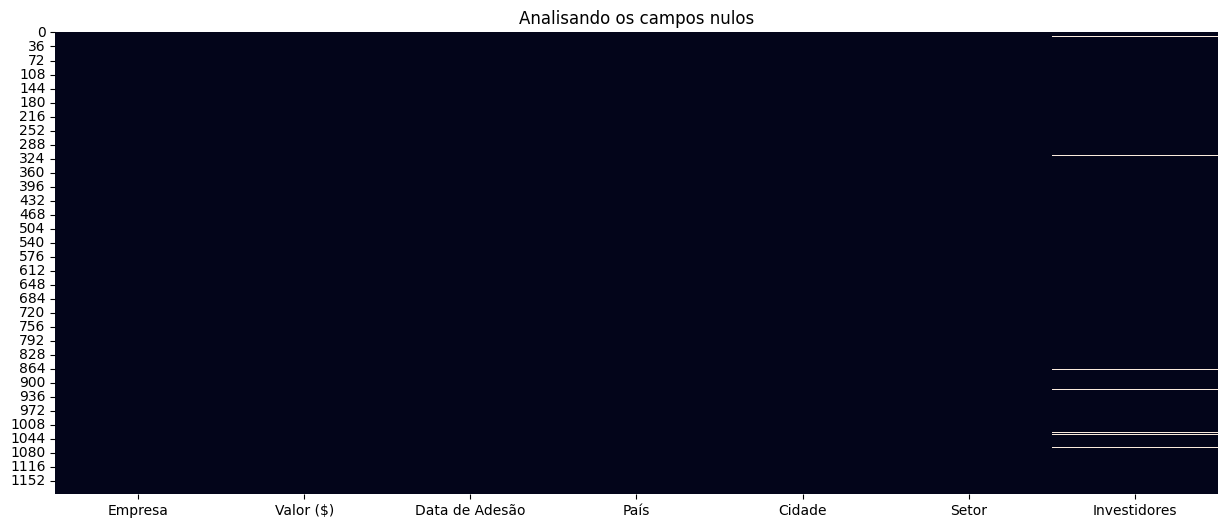

In [ ]:
# Grafico
plt.figure(figsize=(15, 6))
plt.title('Analisando os campos nulos')
sns.heatmap(base_Dados.isnull(), cbar=False);

Com isso, não sera um problema

# Verificando os campos únicos

In [ ]:
base_Dados.nunique()

,0
Empresa,1183
Valor ($),222
Data de Adesão,695
País,48
Cidade,286
Setor,34
Investidores,1152


In [ ]:
# valores únicos
base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

Temos um problema, alguns investidores estão na coluna de 'Setor'. Vamos verificar o que esta acontecendo

In [ ]:
# Organizandos os dados em ranking
base_Dados['Setor'].value_counts()

,count
Setor,
Fintech,239
Internet software & services,224
E-commerce & direct-to-consumer,103
Health,94
Artificial intelligence,74
Other,65
"Supply chain, logistics, & delivery",65
Cybersecurity,58
Data management & analytics,45


Colocando todos os registros em minusculo para nao haver problemas

In [ ]:
base_Dados['Setor'] = base_Dados['Setor'].str.strip().str.lower()
base_Dados['Setor'].value_counts()

,count
Setor,
fintech,239
internet software & services,224
e-commerce & direct-to-consumer,103
health,94
artificial intelligence,85
"supply chain, logistics, & delivery",65
other,65
cybersecurity,58
data management & analytics,45


Vamos verificar o que esta acontecendo nos dados que possuem investidores no lugar do setor. Como podemos notar, possuimos 17 investirores em setor.

## Importando libs

In [ ]:
!pip install pandasql
from pandasql import sqldf

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=88f6a2e744449297e2e1f0ac42bcbd979676dcabec3aba2bbd0c29d2a01f565f
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


## Consultados dados

O que faz essa consulta?
Essa consulta vai retorna todos os dados onde os setores são nulos e faz uma subquery onde a ocorrecia dos registro em setor é igual a 1.

In [ ]:

query = """
SELECT *
FROM base_Dados
WHERE Investidores IS NULL
AND Setor IN (
    SELECT Setor
    FROM base_Dados
    GROUP BY Setor
    HAVING COUNT(*) = 1
)
"""

resultado = sqldf(query)

resultado.head(17)

,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores
0,FTX,$32,7/20/2021,Bahamas,Fintech,"sequoia capital, thoma bravo, softbank",None
1,HyalRoute,$3.50,5/26/2020,Singapore,Mobile & telecommunications,kuang-chi,None
2,Amber Group,$3,6/21/2021,Hong Kong,Fintech,"tiger global management, tiger brokers, dcm ve...",None
3,Moglix,$2.60,5/17/2021,Singapore,E-commerce & direct-to-consumer,"jungle ventures, accel, venture highway",None
4,Coda Payments,$2.50,4/15/2022,Singapore,Fintech,"gic. apis partners, insight partners",None
5,Advance Intelligence Group,$2,9/23/2021,Singapore,Artificial intelligence,"vision plus capital, gsr ventures, zhenfund",None
6,Trax,$2,7/22/2019,Singapore,Artificial intelligence,"hopu investment management, boyu capital, dc t...",None
7,Carousell,$1.10,9/15/2021,Singapore,E-commerce & direct-to-consumer,"500 global, rakuten ventures, golden gate vent...",None
8,WeLab,$1,11/8/2017,Hong Kong,Fintech,"sequoia capital china, ing, alibaba entreprene...",None
9,PatSnap,$1,3/16/2021,Singapore,Internet software & services,"sequoia capital china, shunwei capital partner...",None


Como podemos notar, temos um problema nas colunas 'cidade' e 'setor', os dados
estão uma linha a frente.

Como não temos a certeza que esse dados estão corretos, vamos excluir essas linhas para não haver problemas em nossa análise.

In [ ]:
# Antes de excluir, vou fazer um backup
base_Dados_backup = base_Dados.copy()

In [ ]:
# 1. Identificar os setores com apenas 1 ocorrência (prováveis investidores)
setores_com_1_ocorrencia = base_Dados['Setor'].value_counts()
setores_errados = setores_com_1_ocorrencia[setores_com_1_ocorrencia == 1].index

# 2. Obter os índices das linhas erradas
indices_para_excluir = base_Dados[
    base_Dados['Setor'].isin(setores_errados) &
    base_Dados['Investidores'].isna()
].index

# 3. Removendo as linhas
base_Dados.drop(index=indices_para_excluir, inplace=True)

# 4. Resetando o índice para manter o DataFrame limpo
base_Dados.reset_index(drop=True, inplace=True)


In [ ]:
base_Dados['Setor'].value_counts()

,count
Setor,
fintech,239
internet software & services,224
e-commerce & direct-to-consumer,103
health,94
artificial intelligence,85
other,65
"supply chain, logistics, & delivery",65
cybersecurity,58
data management & analytics,45


Pronto, os dados foram excluidos. Vamos continuar com a análise

In [ ]:
round(base_Dados['Setor'].value_counts(normalize=True) * 100,1) # analisando de forma percentual

,proportion
Setor,
fintech,20.4
internet software & services,19.2
e-commerce & direct-to-consumer,8.8
health,8.0
artificial intelligence,7.3
other,5.6
"supply chain, logistics, & delivery",5.6
cybersecurity,5.0
data management & analytics,3.8


Podemos dizer que quase 50% das startups globais, estao entre fintech, e-commece e alguns de softwares

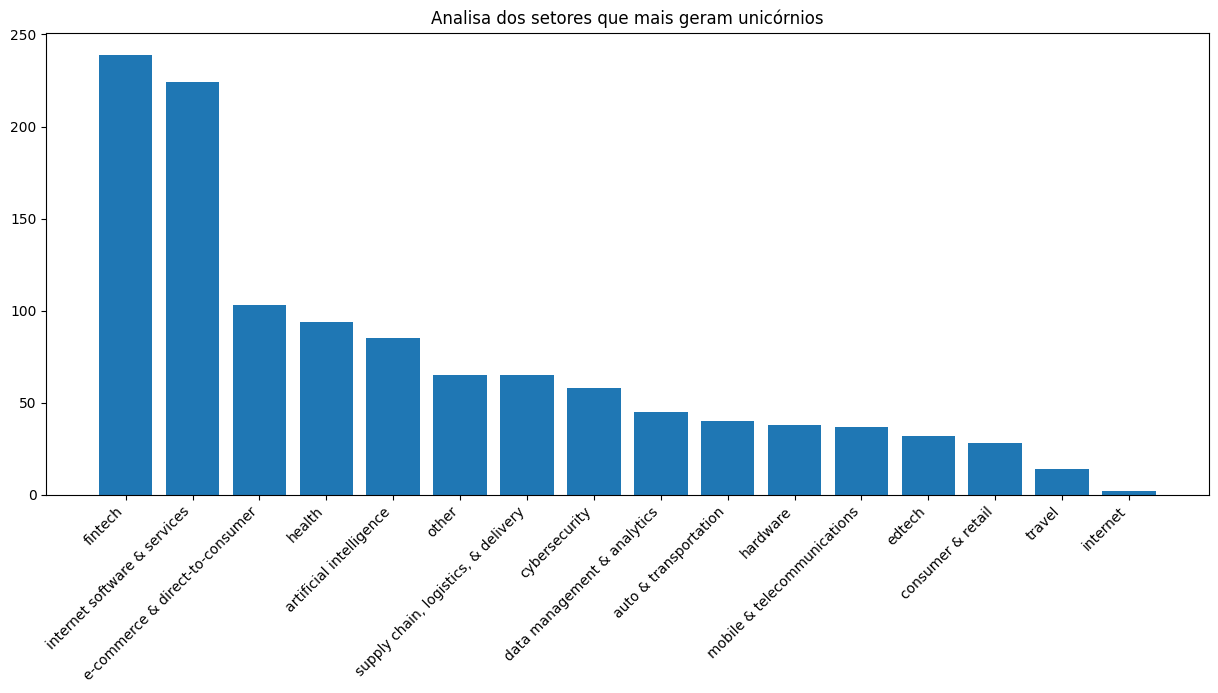

In [ ]:
# Usando Gráficos


plt.figure(figsize=(15, 6))
plt.title('Analisa dos setores que mais geram unicórnios')
plt.bar(base_Dados['Setor'].value_counts().index, base_Dados['Setor'].value_counts());

plt.xticks(rotation=45, ha = 'right');

In [ ]:
analise = round (base_Dados['País'].value_counts(normalize=True)*100, 1)
print(analise)

País
United States           54.4
China                   14.9
India                    6.0
United Kingdom           3.9
Germany                  2.5
France                   2.1
Israel                   1.9
Canada                   1.6
South Korea              1.5
Brazil                   1.5
Sweden                   0.7
Australia                0.7
Mexico                   0.7
Indonesia                0.6
Netherlands              0.6
Switzerland              0.5
Ireland                  0.5
Japan                    0.5
Norway                   0.4
Spain                    0.3
Finland                  0.3
Hong Kong                0.3
United Arab Emirates     0.3
Belgium                  0.3
Turkey                   0.3
Colombia                 0.3
Chile                    0.2
Estonia                  0.2
Austria                  0.2
Denmark                  0.2
South Africa             0.2
Vietnam                  0.2
Lithuania                0.2
Croatia                  0.2
Philippin

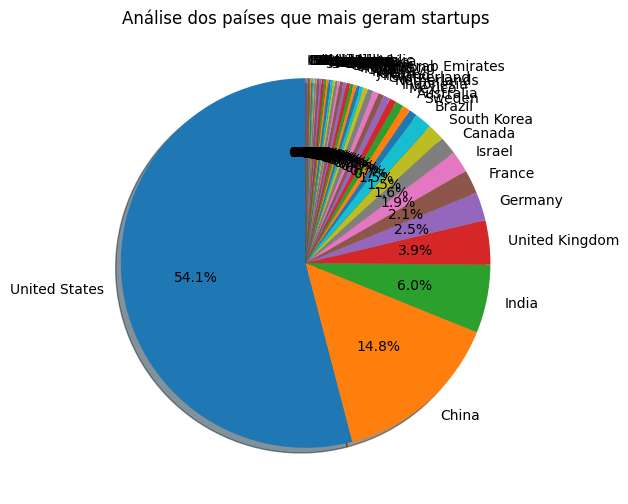

In [ ]:
# Gráfico de Pizza
plt.figure(figsize=(15, 6))
plt.title('Análise dos países que mais geram startups')
plt.pie(
    analise,
    labels = analise.index,
    shadow = True,
    autopct = '%.1f%%',
    startangle=90,

);

Criando um top 10

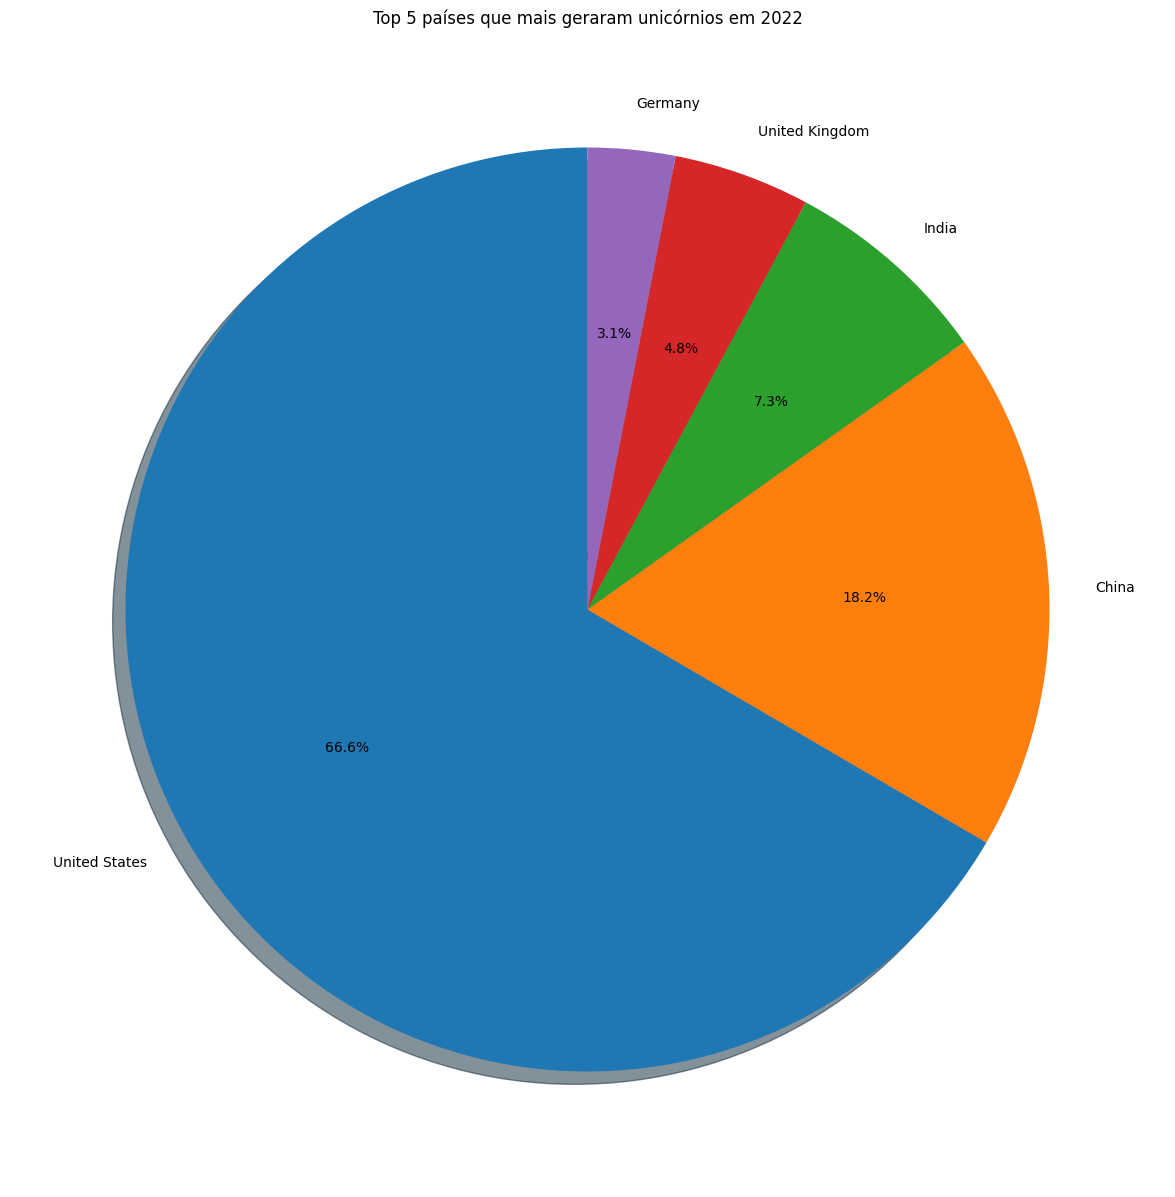

In [ ]:
# Gráfico de Pizza
plt.figure(figsize=(20, 15))
plt.title('Top 5 países que mais geraram unicórnios em 2022')
plt.pie(
    analise.head(5),
    labels = analise.index[0:5],
    shadow = True,
    autopct = '%.1f%%',
    startangle=90,

);

Gráfico interativo e limpo

In [ ]:
import plotly.express as px

In [ ]:




fig = px.pie (
    analise.head(10),
    values = analise.head(10).values,
    names = analise.head(10).index,
hole=0.5,
    title = 'Top 10 países que mais geraram unicórnios em 2022'
)



fig.show()

Convertendo as datas de object oara date

In [ ]:
base_Dados['Data de Adesão'] = pd.to_datetime(base_Dados['Data de Adesão'])
base_Dados['Data de Adesão'].head()

,Data de Adesão
0,2017-04-07
1,2012-12-01
2,2018-07-03
3,2014-01-23
4,2018-01-08


In [ ]:
# extraindo o ano e o mês

base_Dados['Mês'] = pd.DatetimeIndex(base_Dados['Data de Adesão']).month

base_Dados['Ano'] = pd.DatetimeIndex(base_Dados['Data de Adesão']).year

base_Dados.head()

,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,e-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
# tabela analítica
analise_groupby= base_Dados.groupby( by= ['País', 'Ano','Mês','Empresa']).count()['Cidade'].reset_index()
analise_groupby

,País,Ano,Mês,Empresa,Cidade
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
1164,United States,2022,8,Flow,1
1165,United States,2022,8,Incredible Health,1
1166,United States,2022,8,Orna Therapeutics,1
1167,Vietnam,2021,10,Sky Mavis,1


In [ ]:
analise_groupby.loc[
   analise_groupby['País'] == 'Brazil'


]

,País,Ano,Mês,Empresa,Cidade
15,Brazil,2018,7,Movile,1
16,Brazil,2018,11,iFood,1
17,Brazil,2019,6,Loggi,1
18,Brazil,2019,9,QuintoAndar,1
19,Brazil,2019,10,EBANX,1
20,Brazil,2019,12,Wildlife Studios,1
21,Brazil,2020,1,Loft,1
22,Brazil,2020,12,C6 Bank,1
23,Brazil,2020,12,Creditas,1
24,Brazil,2021,1,MadeiraMadeira,1


In [ ]:

# Transformando a coluna valor

base_Dados['Valor ($)'] = pd.to_numeric(base_Dados['Valor ($)'].apply(lambda Linha: Linha.replace('$', '')))
base_Dados.head()

,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,ByteDance,140.0,2017-04-07,China,Beijing,artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,e-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018
